<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DBSCAN</a></span><ul class="toc-item"><li><span><a href="#Simulando-Luas" data-toc-modified-id="Simulando-Luas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulando Luas</a></span></li><li><span><a href="#Utilizando-o-DBSCAN" data-toc-modified-id="Utilizando-o-DBSCAN-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Utilizando o DBSCAN</a></span></li><li><span><a href="#Como-encontrar-eps-(e-min_samples)" data-toc-modified-id="Como-encontrar-eps-(e-min_samples)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Como encontrar eps (e min_samples)</a></span></li></ul></li><li><span><a href="#Aplicações" data-toc-modified-id="Aplicações-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aplicações</a></span><ul class="toc-item"><li><span><a href="#Agrupando-Vinhos" data-toc-modified-id="Agrupando-Vinhos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Agrupando Vinhos</a></span><ul class="toc-item"><li><span><a href="#Carregando-dados" data-toc-modified-id="Carregando-dados-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Carregando dados</a></span></li><li><span><a href="#Reduzindo-variáveis-usando-PCA" data-toc-modified-id="Reduzindo-variáveis-usando-PCA-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Reduzindo variáveis usando PCA</a></span></li></ul></li><li><span><a href="#Padrões-de-Consumo-Elétrico-em-uma-Casa" data-toc-modified-id="Padrões-de-Consumo-Elétrico-em-uma-Casa-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Padrões de Consumo Elétrico em uma Casa</a></span></li></ul></li><li><span><a href="#Notas-finais" data-toc-modified-id="Notas-finais-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Notas finais</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#GMM" data-toc-modified-id="GMM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>GMM</a></span></li><li><span><a href="#HACs-(Modelos-Hierarquicos)" data-toc-modified-id="HACs-(Modelos-Hierarquicos)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>HACs (Modelos Hierarquicos)</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li><li><span><a href="#EXERCICIO-FINAL" data-toc-modified-id="EXERCICIO-FINAL-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EXERCICIO FINAL</a></span></li></ul></div>

In [2]:
import datapackage
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# DBSCAN

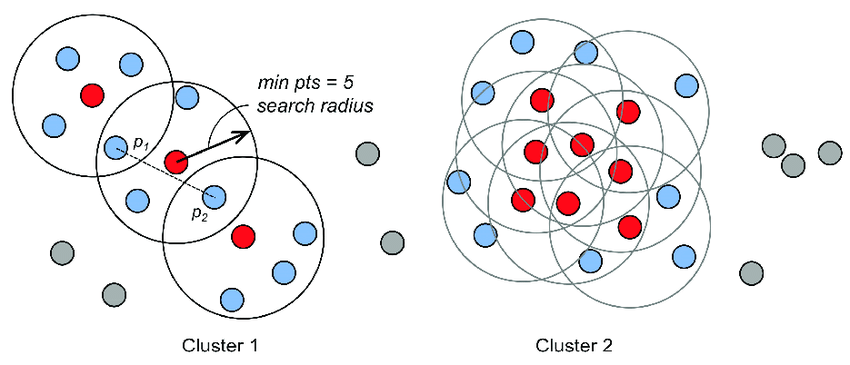

Epsilon (eps) é o raio a partir da cada ponto no qual o algoritmo vai buscar vizinhos para cada ponto do dataset. Toda vez que o algoritmo encontra pelo menos N pontos (min_samples) nesta vizinhaça o ponto é marcado como **core**.

Após marcar todos os pontos desta maneira, o algoritmo aglomera todas as vizinhanças que tenham uma intersecção em clusters. Os pontos que não se encaixaram em nenhuma vizinhança são classificados como 'outliers'.

## Simulando Luas

In [97]:
from sklearn.datasets import make_moons

<AxesSubplot:xlabel='X1', ylabel='X2'>

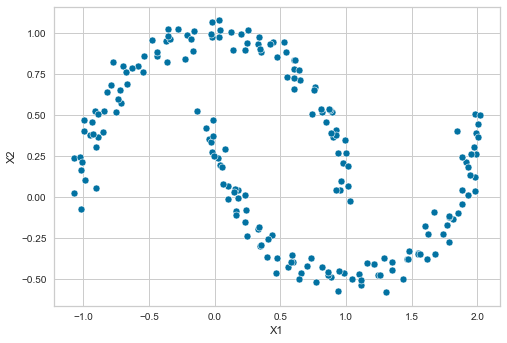

In [98]:
X, y = make_moons(200, noise=.05, random_state=0)
tb_moon = pd.DataFrame(X, columns = ['X1', 'X2'])
sns.scatterplot(data=tb_moon, x = 'X1', y = 'X2')

## Utilizando o DBSCAN

In [99]:
from sklearn.cluster import DBSCAN

In [100]:
db = DBSCAN(eps=0.3, min_samples=10)
tb_moon['clu_dbscan'] = [str(x) for x in db.fit_predict(X)]

<AxesSubplot:xlabel='X1', ylabel='X2'>

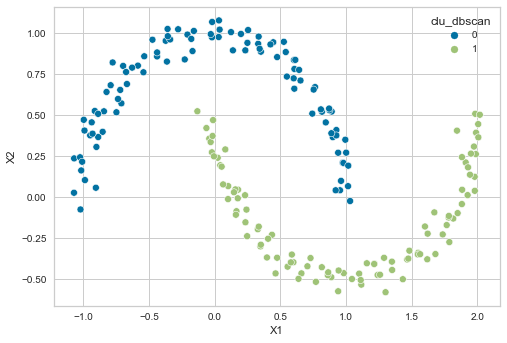

In [101]:
sns.scatterplot(data=tb_moon, x = 'X1', y = 'X2', hue = 'clu_dbscan')

## Como encontrar eps (e min_samples)

In [102]:
from sklearn.neighbors import NearestNeighbors

In [103]:
neighbors = 10
nbrs = NearestNeighbors(n_neighbors=neighbors )
nbrs.fit(tb_moon[['X1', 'X2']])

NearestNeighbors(n_neighbors=10)

In [104]:
distances, indices = nbrs.kneighbors(tb_moon[['X1', 'X2']])

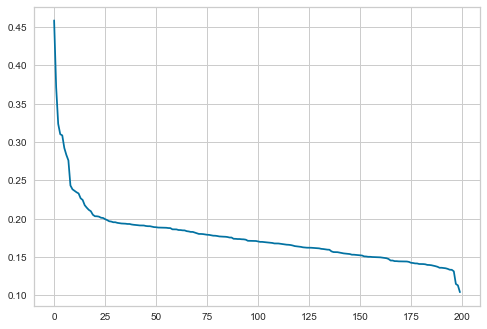

In [105]:
distance_desc = sorted(distances[:,-1], reverse=True)
plt.plot(distance_desc)

In [106]:
from kneed import KneeLocator

0.20331641834526806


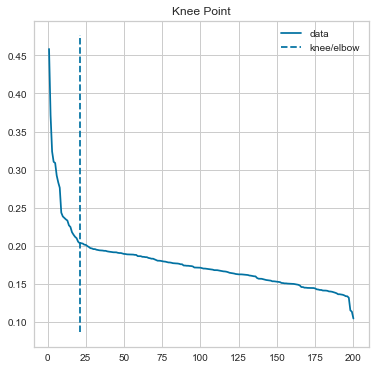

In [107]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=1.0,
                      curve="convex",
                      direction="decreasing")
kneedle.plot_knee();
print(kneedle.knee_y)

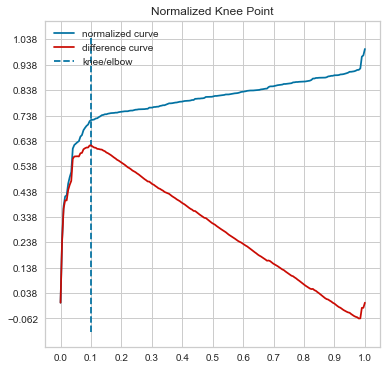

In [108]:
kneedle.plot_knee_normalized();

In [109]:
for i in range(3, 20):
    neighbors = i
    nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(tb_moon[['X1', 'X2']])
    distances, indices = nbrs.kneighbors(tb_moon[['X1', 'X2']])
    distance_desc = sorted(distances[:,-1], reverse=True)
    kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=1.0,
                      curve="convex",
                      direction="decreasing")
    print(f'Neigh = {i}, eps = {kneedle.knee_y}, rank_eps = {kneedle.knee}')

Neigh = 3, eps = 0.11846042559138546, rank_eps = 8
Neigh = 4, eps = 0.11757389105250853, rank_eps = 20
Neigh = 5, eps = 0.13846719589781348, rank_eps = 18
Neigh = 6, eps = 0.14428707672442997, rank_eps = 23
Neigh = 7, eps = 0.17316135644391561, rank_eps = 15
Neigh = 8, eps = 0.1874358690548748, rank_eps = 11
Neigh = 9, eps = 0.19428742854825456, rank_eps = 18
Neigh = 10, eps = 0.20331641834526806, rank_eps = 21
Neigh = 11, eps = 0.21676283789271758, rank_eps = 23
Neigh = 12, eps = 0.2415676791444658, rank_eps = 19
Neigh = 13, eps = 0.37425697235070243, rank_eps = 5
Neigh = 14, eps = 0.32434993774209603, rank_eps = 14
Neigh = 15, eps = 0.36996410600713125, rank_eps = 11
Neigh = 16, eps = 0.42625359334499163, rank_eps = 9
Neigh = 17, eps = 0.31195001822699897, rank_eps = 31
Neigh = 18, eps = 0.45027156833030013, rank_eps = 12
Neigh = 19, eps = 0.4659414271892953, rank_eps = 13


<AxesSubplot:xlabel='X1', ylabel='X2'>

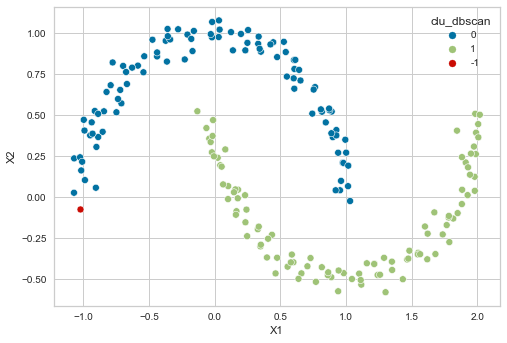

In [117]:
db = DBSCAN(eps=0.311, min_samples=17)
tb_moon['clu_dbscan'] = [str(x) for x in db.fit_predict(X)]
sns.scatterplot(data=tb_moon, x = 'X1', y = 'X2', hue = 'clu_dbscan')

# Aplicações

## Agrupando Vinhos

### Carregando dados

In [26]:
tb_wine = pd.read_csv('data/wine-clustering.csv')

In [27]:
tb_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Reduzindo variáveis usando PCA

In [28]:
wine_scaler = StandardScaler()
tb_wine_std = pd.DataFrame(wine_scaler.fit_transform(tb_wine),
                           columns = tb_wine.columns)

In [29]:
from sklearn.decomposition import PCA
wine_pca = PCA()
wine_pca.fit(tb_wine_std)

PCA()

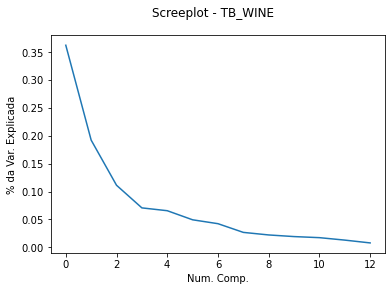

In [30]:
plt.plot(wine_pca.explained_variance_ratio_);
plt.xlabel('Num. Comp.');
plt.ylabel('% da Var. Explicada');
plt.suptitle('Screeplot - TB_WINE');

In [31]:
wine_pca = PCA(4)
tb_wine_pca = pd.DataFrame(wine_pca.fit_transform(tb_wine_std), 
                           columns = ['PC1', 'PC2', 'PC3', 'PC4'])

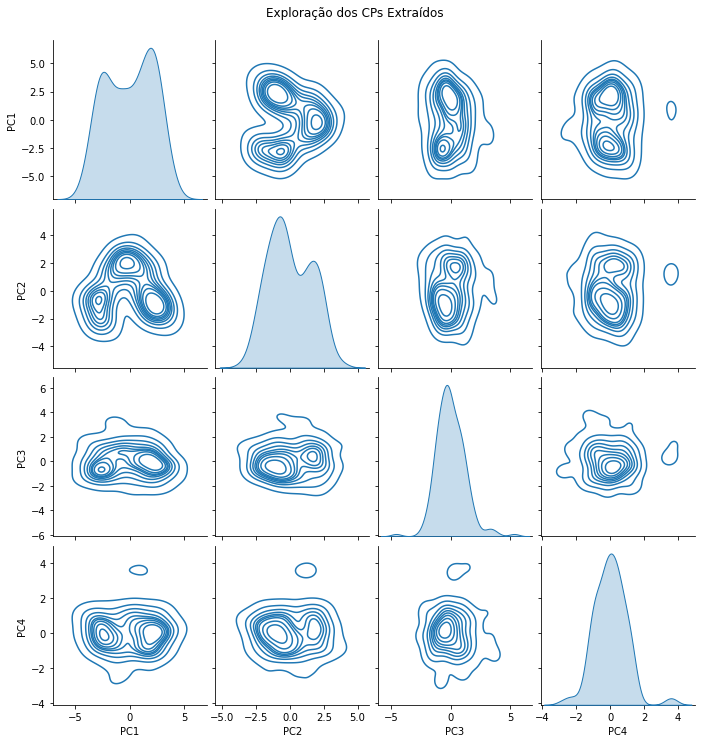

In [32]:
rel = sns.pairplot(tb_wine_pca, kind = 'kde');
rel.fig.suptitle('Exploração dos CPs Extraídos', y=1.03);

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

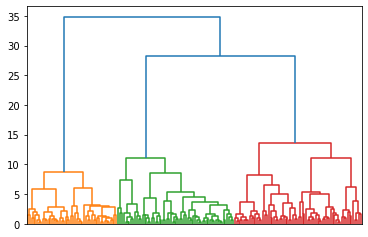

In [37]:
Z = linkage(tb_wine_pca, method='ward')
dendrogram_ = dendrogram(Z, no_labels=True)

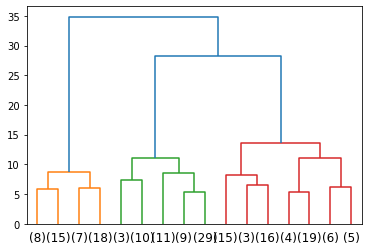

In [38]:
dendrogram_ = dendrogram(Z,p = 16, truncate_mode = 'lastp')

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
wine_k2 = AgglomerativeClustering(n_clusters = 2, linkage = 'ward').fit_predict(tb_wine_pca)
wine_k3 = AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit_predict(tb_wine_pca)
wine_k6 = AgglomerativeClustering(n_clusters = 6, linkage = 'ward').fit_predict(tb_wine_pca)

In [41]:
from yellowbrick.features import PCA as PCAyb

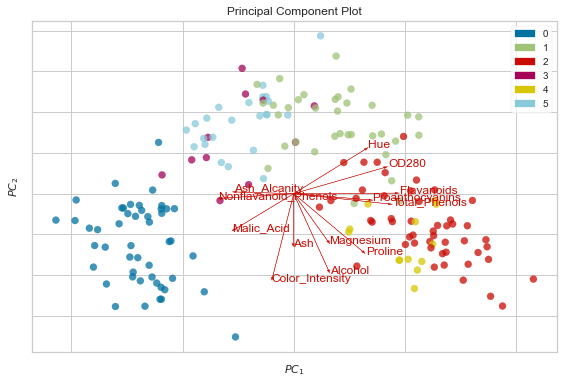

In [42]:
visualizer = PCAyb(scale = True, proj_features=True)
visualizer.fit_transform(tb_wine, wine_k6)
visualizer.show();

In [43]:
tb_wine_pca['wine_k2'] = [str(x) for x in wine_k2]
tb_wine_pca['wine_k3'] = [str(x) for x in wine_k3]
tb_wine_pca['wine_k6'] = [str(x) for x in wine_k6]

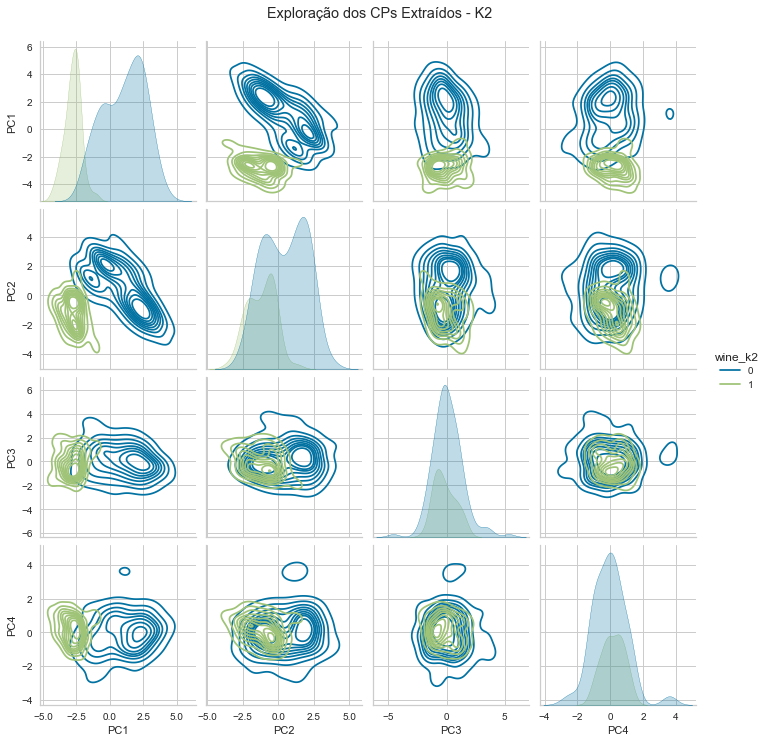

In [44]:
rel = sns.pairplot(tb_wine_pca, 
                   kind = 'kde', 
                   vars = ['PC1', 'PC2', 'PC3', 'PC4'],
                   hue = 'wine_k2');
rel.fig.suptitle('Exploração dos CPs Extraídos - K2', y=1.03);

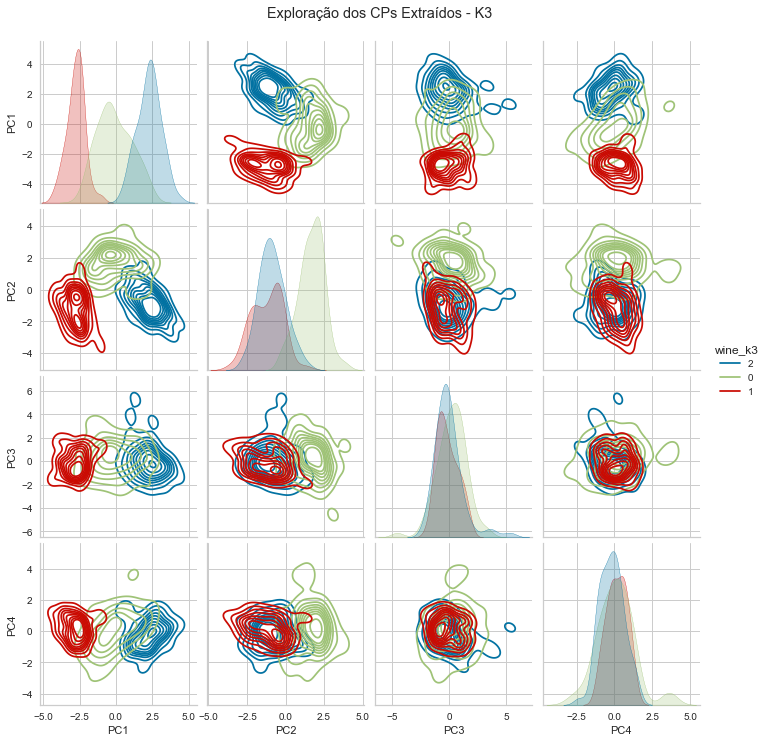

In [45]:
rel = sns.pairplot(tb_wine_pca, 
                   kind = 'kde', 
                   vars = ['PC1', 'PC2', 'PC3', 'PC4'],
                   hue = 'wine_k3');
rel.fig.suptitle('Exploração dos CPs Extraídos - K3', y=1.03);

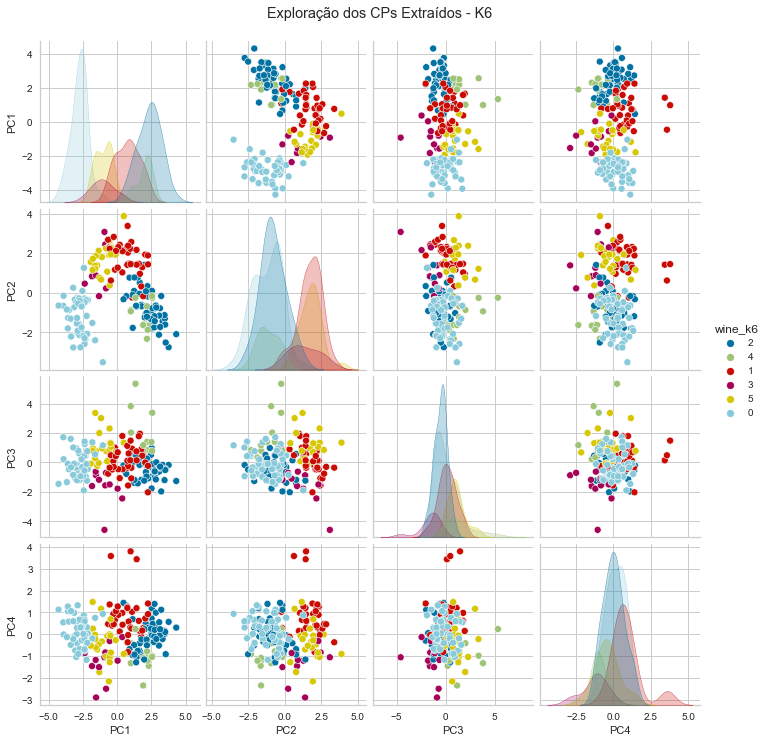

In [46]:
rel = sns.pairplot(tb_wine_pca, 
                   vars = ['PC1', 'PC2', 'PC3', 'PC4'],
                   hue = 'wine_k6');
rel.fig.suptitle('Exploração dos CPs Extraídos - K6', y=1.03);

<AxesSubplot:xlabel='PC1', ylabel='PC3'>

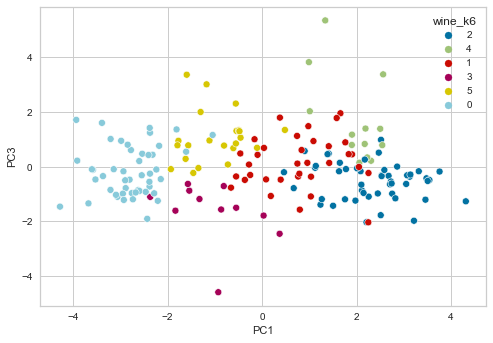

In [48]:
sns.scatterplot(data = tb_wine_pca, x = 'PC1', y = 'PC3', hue = 'wine_k6')

In [ ]:
Z = linkage(np.array(tb_wine_std).T, method='average', metric = 'correlation')
dendrogram_ = dendrogram(Z, labels = tb_wine_std.columns, leaf_rotation = 90)

## Padrões de Consumo Elétrico em uma Casa

In [188]:
tb_house = pd.read_csv('data/household_power_consumption.txt', 
                       sep = ';', decimal = '.', na_values='?')
tb_house['date_time_str'] = tb_house['Date'] + " " + tb_house['Time']
tb_house.columns = [x.lower() for x in tb_house.columns]
tb_house = tb_house.dropna()
tb_house_samp = tb_house.sample(5000)

In [189]:
tb_house_samp['date_time'] = pd.to_datetime(tb_house_samp['date_time_str'])

In [190]:
tb_house_samp.head()

,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,date_time_str,date_time
1928053,16/8/2010,15:37:00,0.814,0.298,243.17,3.8,0.0,0.0,11.0,16/8/2010 15:37:00,2010-08-16 15:37:00
733636,9/5/2008,04:40:00,0.336,0.100,239.79,1.4,0.0,0.0,1.0,9/5/2008 04:40:00,2008-09-05 04:40:00
1302046,7/6/2009,22:10:00,0.362,0.000,238.03,1.6,0.0,0.0,0.0,7/6/2009 22:10:00,2009-07-06 22:10:00
1998766,4/10/2010,18:10:00,0.280,0.064,242.57,1.2,0.0,0.0,0.0,4/10/2010 18:10:00,2010-04-10 18:10:00
1847008,21/6/2010,08:52:00,1.444,0.000,237.84,6.0,0.0,0.0,18.0,21/6/2010 08:52:00,2010-06-21 08:52:00


In [191]:
tb_house_samp.columns

Index(['date', 'time', 'global_active_power', 'global_reactive_power',
       'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3', 'date_time_str', 'date_time'],
      dtype='object')

In [192]:
num_vars = ['global_active_power', 'global_reactive_power',
       'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3']
X_house = tb_house_samp[num_vars]

In [193]:
house_scaler = StandardScaler()
tb_house_std = pd.DataFrame(house_scaler.fit_transform(X_house), columns = num_vars)

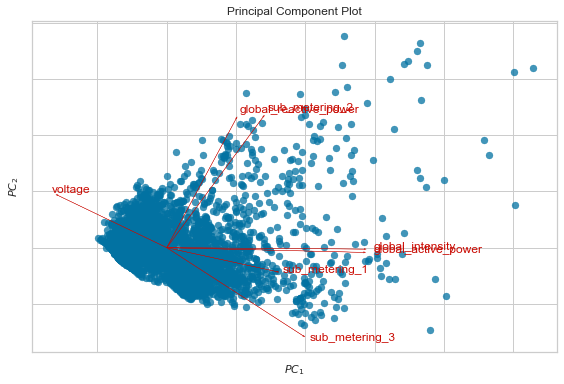

In [194]:
visualizer = PCAyb(proj_features=True)
visualizer.fit_transform(tb_house_std)
visualizer.show();

In [208]:
clu_vars = ['sub_metering_1', 'sub_metering_2', 'sub_metering_3', 'voltage', 'global_intensity']

In [224]:
for i in [2, 5, 10, 20]:
    neighbors = i
    nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(tb_house_std[clu_vars])
    distances, indices = nbrs.kneighbors(tb_house_std[clu_vars])
    distance_desc = sorted(distances[:,-1], reverse=True)
    kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=1.0,
                      curve="convex",
                      direction="decreasing")
    print(f'Neigh = {i}, eps = {kneedle.knee_y}, rank_eps = {kneedle.knee}')

Neigh = 2, eps = 1.5673369696119703, rank_eps = 14
Neigh = 5, eps = 1.3466586670052128, rank_eps = 60
Neigh = 10, eps = 1.3637741322316863, rank_eps = 105
Neigh = 20, eps = 1.8546722856811417, rank_eps = 110


In [3]:
db = DBSCAN(eps=1.36, min_samples=10)
tb_house_samp['clu_dbscan'] = [str(x) for x in db.fit_predict(tb_house_std[clu_vars])]
tb_house_samp['clu_dbscan'].value_counts()/5000 * 24 * 60

NameError: name 'DBSCAN' is not defined

In [238]:
tb_house_samp_no0 = tb_house_samp[tb_house_samp['clu_dbscan']!='0'].copy()

<AxesSubplot:xlabel='clu_dbscan', ylabel='sub_metering_1'>

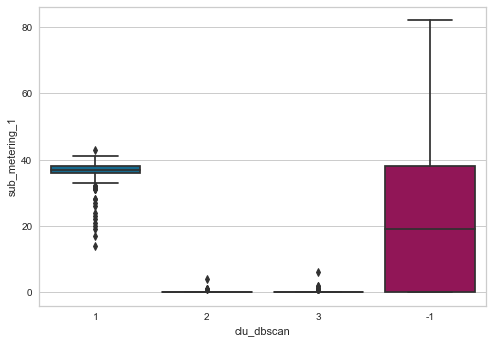

In [241]:
sns.boxplot(data = tb_house_samp_no0, x = 'clu_dbscan', y = clu_vars[0])

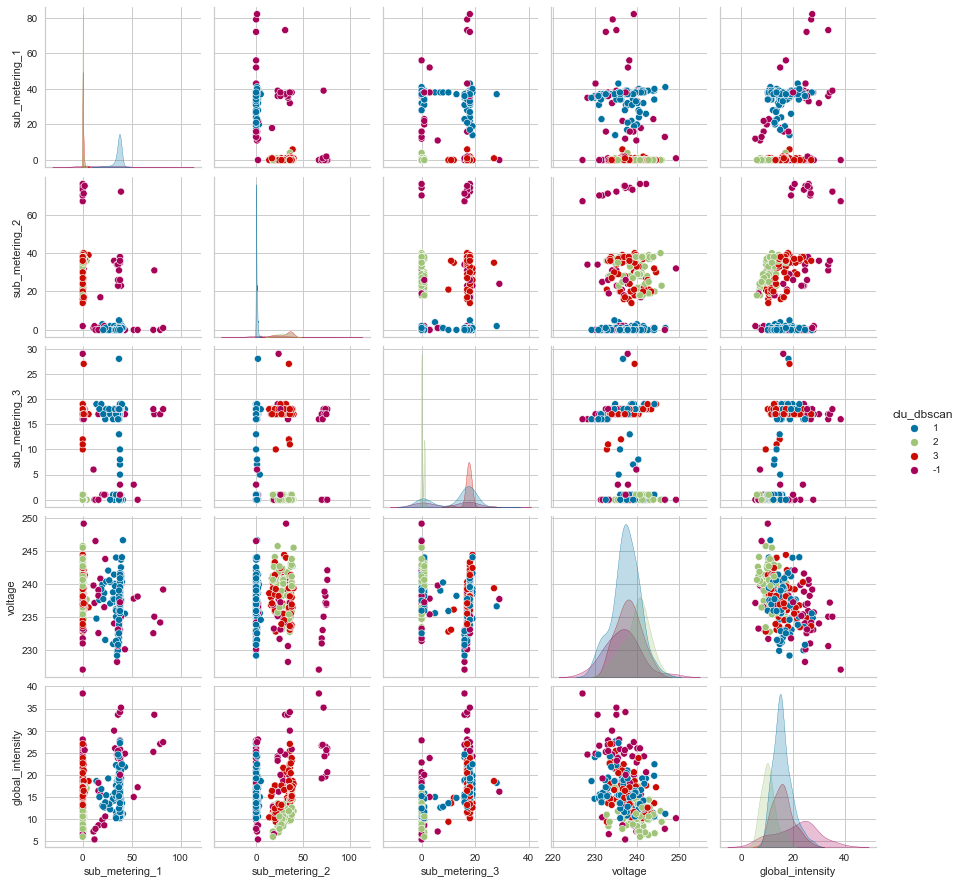

In [240]:
sns.pairplot(data = tb_house_samp_no0, vars = clu_vars, hue = 'clu_dbscan')

In [1]:
from sklearn.cluster import OPTICS

In [2]:
optics = OPTICS(min_samples=10)
tb_house_samp['clu_optics'] = [str(x) for x in optics.fit_predict(tb_house_std[clu_vars])]
tb_house_samp['clu_optics'].value_counts()/5000 * 24 * 60

NameError: name 'tb_house_std' is not defined

# Notas finais

Ao longo da semana vimos 4 algoritmos diferentes de clusterização:

* KMeans
* GMM
* HACs
* DBSCAN

## KMeans

**Vantagens:** 
* algoritmo simples 
* único parâmetro

**Desvantagens:** 
* estimar o # de clusters
* não captura padrões complexos

KMeans é um bom ponto de partida para qualquer tarefa de clusterização. Devemos tomar cuidado com a estrutura de covariância dos nossos dados: se tivermos muitas variáveis correlatas, o algoritmo não irá capturar bons padrões.

**PADRÃO CAPTURADO: BLOBS**

## GMM

**Vantagens:** 
* algoritmo (razoavelmente) simples.
* único parâmetro.
* modelo probabilístico.
* estima probabilidade de cada ponto pertencer à um cluster.

**Desvantagens:** 
* estimar o # de clusters.
* muito bom para capturar distribuições normais multivariadas, nem tão bom no resto...

GMM (e outros modelos de mistura) são ótimas escolhas quando conhecemos a distribuição dos nossos dados: um exemplo pratico de normal multivariada é um defeito de fabricação medido em duas variáveis, por exemplo a largura e profundidade do corte de uma embalagem. Conhecendo o processo que gera os dados é fundamental quando escolhemos um GMM.

**PADRÃO CAPTURADO: BLOBS ESTICADOS**

## HACs (Modelos Hierarquicos)

**Vantagens:** 
* muito flexíveis
* nenhum parâmetro
* estima uma estrutura de clusterização hierarquica
* bottom-up

**Desvantagens:** 
* muito flexíveis
* dependem muito de conhecermos bem o problema

Modelos hierarquicos aglomerativos (HACs) são um tipo de algoritmo *bottom-up* capaz de capturar tanto estruturas simples quanto estruturas complexas. O problema é que essa flexibilidade gera uma enorme incerteza na hora de escolhermos uma função de linkage especifica (Ward, Single, Complete...) e uma função de distância específica.

**PADRÃO CAPTURADO: Estruturas hierarquicas de clusters dentro de clusters**

## DBSCAN

**Vantagens:** 
* estima automaticamente o # de clusters
* captura não só padrões de localização mas também padrões de densidade
* não 'clusteriza' todos os pontos, detecta automaticamente outliers

**Desvantagens:** 
* parametrização complexa
* longo tempo para chegar em um resultado interessante

Os modelos de densidade (DBSCAN, OPTICS, HDBSCAN) são modelos custosos computacionalmente mas extremamente flexíveis em termos dos padrões capturados. Embora as técnicas OPTICS e HDBSCAN sejam mais automaticas, esta automatização não é sem custo.

**PADRÃO CAPTURADO: TUDO**

# EXERCICIO FINAL

In [4]:
tb_cc = pd.read_csv('data/CCGENERAL.csv')

In [5]:
tb_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
X = tb_cc.drop('CUST_ID', axis = 1).dropna().copy()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

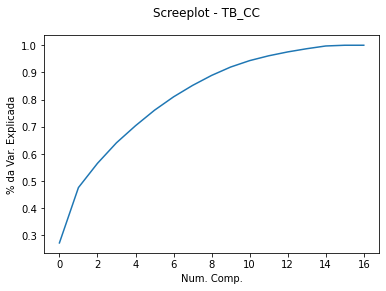

In [11]:
scaler = StandardScaler()
pca_fit = PCA().fit(scaler.fit_transform(X))
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_));
plt.xlabel('Num. Comp.');
plt.ylabel('% da Var. Explicada');
plt.suptitle('Screeplot - TB_CC');

In [15]:
tb_cc_pca = pd.DataFrame(PCA(7).fit_transform(scaler.fit_transform(X)),
                         columns = ['PC_' + str(i) for i in range(1,8)])

In [17]:
import seaborn as sns

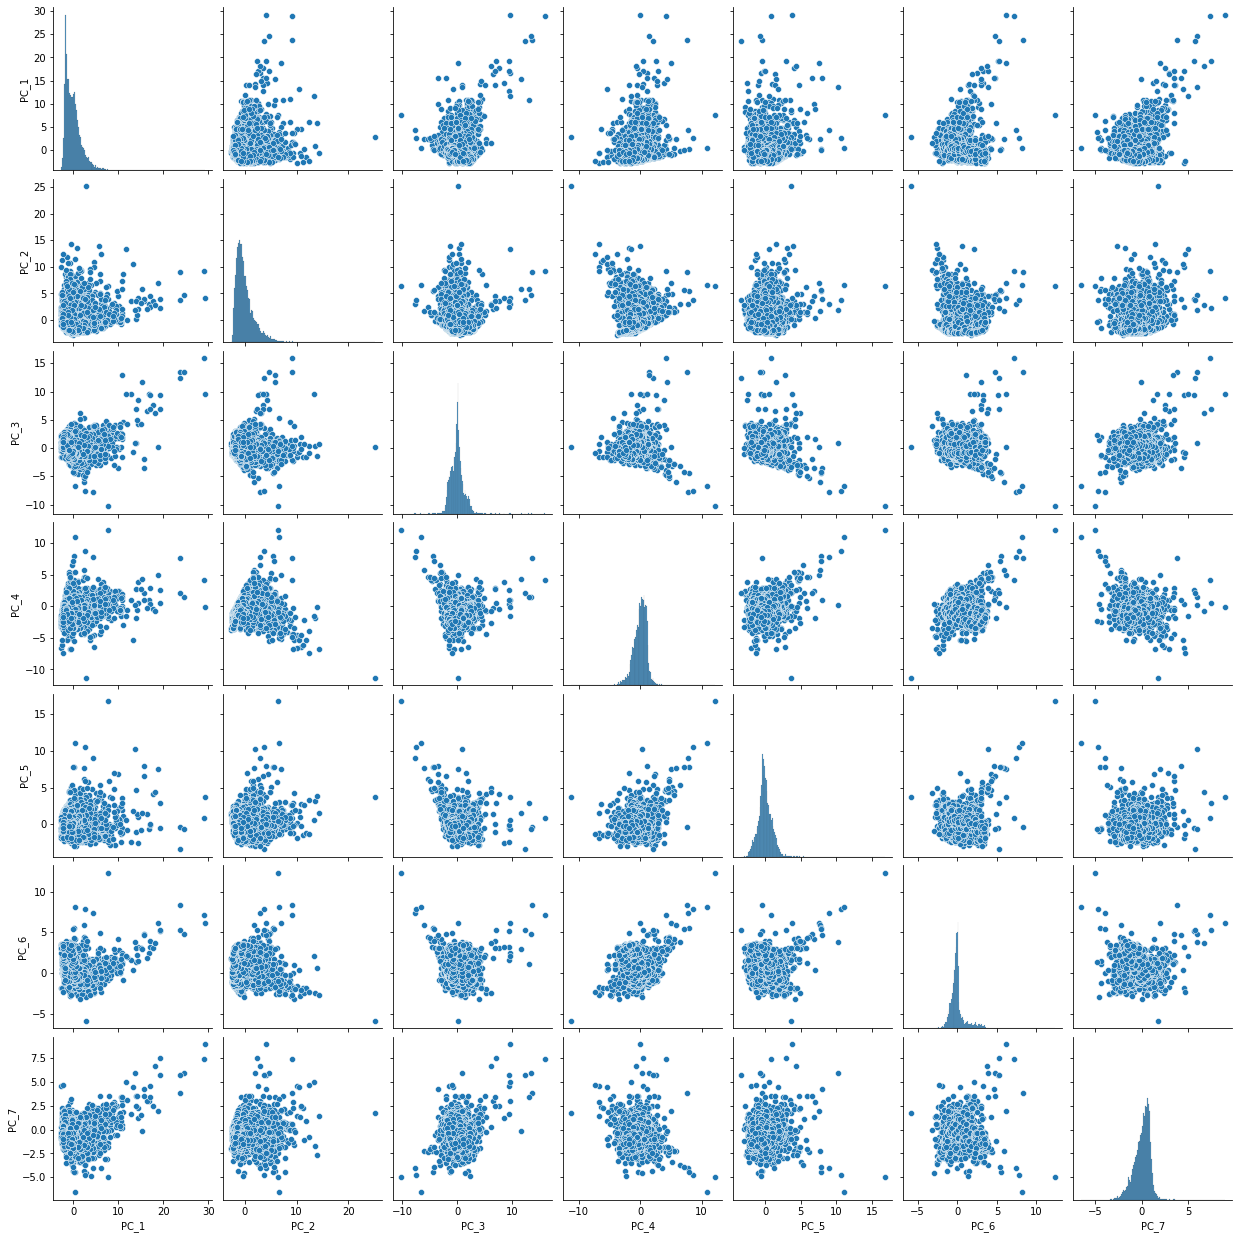

In [18]:
sns.pairplot(tb_cc_pca)